<a href="https://colab.research.google.com/github/M-H-Amini/DeepLearningCourse/blob/master/TFSingleLayerMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name of ALLAH
**Written By Mohammad Hossein Amini**
# Single-Layer Network for MNIST Digits (Keras)
In this projects I'm gonna make a single-layer network for classifying MNIST dataset.


First of all, let's import modules...

In [22]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, InputLayer
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

2.0.0-rc0


# Loading Dataset
Let's load MNIST. This time I do it differently from the last project (From Scratch one).

In [41]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
print(x_train.shape, type(x_train))

(60000, 28, 28) <class 'numpy.ndarray'>


It's a good idea to see one of the elements of MNIST...

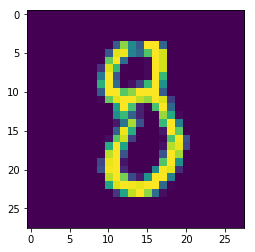

Label: 8


In [27]:
index = np.random.randint(50000)
plt.imshow(x_train[index,:,:])
plt.show()
print('Label: {}'.format(np.argmax(y_train[index]), 1))

# Creating Model
I'm gonna make the model using Keras api...

In [33]:
linmodel = Sequential()

linmodel.add(InputLayer(input_shape=(28, 28)))
linmodel.add(Flatten())

linmodel.add(Dense(units=10, activation='softmax'))

linmodel.compile(loss='categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])
print(linmodel.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


Let's train the model...

In [37]:
epochs = 10 # one epoch takes about 3 seconds
print(type(y_train), y_train.shape)
linhistory = linmodel.fit(x_train, y_train, 
                          epochs=epochs, 
                          batch_size=32,
                          verbose=2)

<class 'numpy.ndarray'> (60000, 10)
Train on 60000 samples
Epoch 1/10
60000/60000 - 3s - loss: 0.2619 - accuracy: 0.9269
Epoch 2/10
60000/60000 - 3s - loss: 0.2584 - accuracy: 0.9281
Epoch 3/10
60000/60000 - 3s - loss: 0.2554 - accuracy: 0.9291
Epoch 4/10
60000/60000 - 3s - loss: 0.2531 - accuracy: 0.9297
Epoch 5/10
60000/60000 - 3s - loss: 0.2509 - accuracy: 0.9305
Epoch 6/10
60000/60000 - 3s - loss: 0.2495 - accuracy: 0.9309
Epoch 7/10
60000/60000 - 3s - loss: 0.2476 - accuracy: 0.9313
Epoch 8/10
60000/60000 - 3s - loss: 0.2466 - accuracy: 0.9319
Epoch 9/10
60000/60000 - 3s - loss: 0.2454 - accuracy: 0.9325
Epoch 10/10
60000/60000 - 3s - loss: 0.2441 - accuracy: 0.9328


It's interesting to see the accuracy and the loss through epochs...

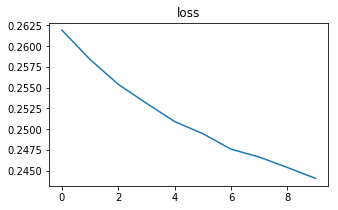

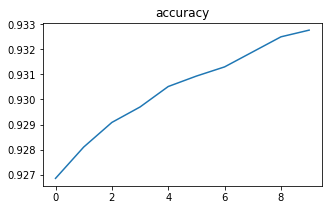

In [38]:
plt.figure(figsize=(5,3))
plt.plot(linhistory.epoch,linhistory.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(linhistory.epoch,linhistory.history['accuracy'])
plt.title('accuracy');

Finally, time for evaluating the trained model...

In [43]:
linscores = linmodel.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (linmodel.metrics_names[1], linscores[1]*100))

10000/1 - 0s - loss: 0.1857 - accuracy: 0.9283
[0.26550534121096137, 0.9283]
accuracy: 92.83%
